# **Color Pop Effect (SPECIFIC COLOR CODE)**
User can decide a color code. Pixels which belongs to another two color families will be turned into grayscale.

The RGB color code is in the format (R, G, B). Each parameter (R, G, and G) defines the intensity of the color as an integer between 0 and 255. For example. the RGB color code of light blue is (173,216,230). Each pixel in the image will be checked to identify whether the pixel is close to the color or not. 

Each R, G and B of all pixels in an image   will be compared to the R, G and B set by the user with ± any value we set. If the RGB Color code of a pixel is (241,45,85), that means the pixel's color is different to the chosen color. Therefore, the RGB Color code will be modified by using formula below. 
 
> 1. value = *(0.290 x R) + (0.587 x G) + (0.114 x B)*

> 2. new_RGB_code = (value, value, value)

### 1. Import necessary libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd 
from PIL import Image
from google.colab.patches import cv2_imshow

### 2. Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### 3. Set working path
The image will be uploaded to this path

In [3]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


### 4. Upload image file

In [4]:
from google.colab import files
uploaded = files.upload()
for key, value in uploaded.items():
  try:
    print(key, 'is successfully uploaded!')
  except:
    print('Your file is not successfully uploaded!')

Saving bg1.png to bg1.png
bg1.png is successfully uploaded!


### 5. Display the uploaded image

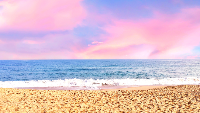

In [5]:
directory = os.getcwd()
img = cv2.imread('{0}/{1}'.format(directory,key))
cv2_imshow(img)

### 6. Create function for process bar
To monitor the progress of image processing

In [6]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

out = display(progress(0, 100), display_id=True)

### 7. Choose a color family to be kept
 
*   Pick a color family among red, green and blue
*   Another two color family will be turned into grayscale

RGB: (146,142,230)


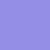

In [22]:
#@title Set Decimal Code R,G,B
color_list = []
red_light = 146 #@param {type:"slider", min:0, max:255, step:1}
green_light = 142 #@param {type:"slider", min:0, max:255, step:1}
blue_light = 230 #@param {type:"slider", min:0, max:255, step:1}

print('RGB: ({0},{1},{2})'.format(red_light,green_light,blue_light))

color_sample = np.zeros((50, 50, 3), dtype=np.uint8)
color_sample[0:51, 0:51] = [blue_light, green_light, red_light] #[b,g,r]

cv2_imshow(color_sample)

### Set tolerance value to RGB


In [25]:
tolerance = int(input("Tolerance range of RGB: "))

Tolerance range of RGB: 70


### 8. Image Processing
This will take few minutes or more according to the size of image. 

In [29]:
height, width = img.shape[:2]
image_arr = np.zeros((height, width, 3), dtype=np.uint8)

max_RGB_value = max(blue_light,green_light,red_light)
max_RGB_index = [blue_light,green_light,red_light].index(max_RGB_value)

for y_coor in range(0,height,1):
  for x_coor in range(0,width,1):
    #time.sleep(0.02)
    (b, g, r) = img[y_coor, x_coor] #image[y-coordinate, x-coordinate]
    if ((b >= blue_light-tolerance and b <= blue_light+tolerance) \
        and (g >= green_light-tolerance and g <= green_light+tolerance) \
        and (r >= red_light-tolerance and r<= red_light+tolerance)):
      image_arr[y_coor, x_coor] = [b, g, r] #[b,g,r]
    else:
      value = 0.299*r + 0.587*g + 0.114*b
      image_arr[y_coor, x_coor] = [value, value, value] #[b,g,r]
    out.update(progress(y_coor, height))

### 9. Display and save the processed image.
The output image will be saved to the same directory in Step 3..

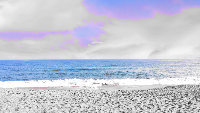

In [30]:
image_arr_final = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
output = Image.fromarray(image_arr_final)
display(output)
output.save(key[:-4]+'_'+'('+str(red_light)+','+str(green_light)+','+str(blue_light)+')'+'±'+str(tolerance)+'.png')